In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk4_step(f, t, y, h):
    """Un pas de RK4."""
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2)*k1)
    k3 = f(t + h/2, y + (h/2)*k2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def solve_rk4(f, t0, y0, h, tf):
    """Résout l'EDO avec RK4 sur [t0, tf]."""
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = rk4_step(f, t[i-1], y[i-1], h)
    return t, y

# Définition de l'EDO : y' = y(1 - y)
def f(t, y):
    return y * (1 - y)

# Paramètres
t0, y0, tf, h = 0, 0.5, 5, 0.1

# Solution numérique avec RK4
t_rk4, y_rk4 = solve_rk4(f, t0, y0, h, tf)

# Solution exacte pour comparaison
t_exact = np.linspace(t0, tf, 1000)
y_exact = 1 / (1 + np.exp(-t_exact))

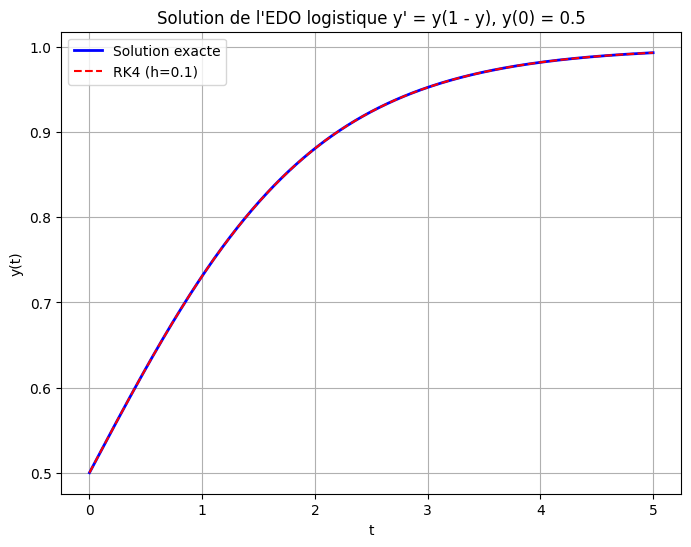

Valeur finale (RK4) : y(5) ≈ 0.993307
Valeur exacte : y(5) = 0.993307


In [4]:
plt.figure(figsize=(8, 6))
plt.plot(t_exact, y_exact, 'b-', linewidth=2, label='Solution exacte')
plt.plot(t_rk4, y_rk4, 'r--', markersize=4, label='RK4 (h=0.1)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution de l\'EDO logistique y\' = y(1 - y), y(0) = 0.5')
plt.legend()
plt.grid(True)
plt.savefig('graph.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Affichage de la valeur finale pour vérification
print(f"Valeur finale (RK4) : y(5) ≈ {y_rk4[-1]:.6f}")
print(f"Valeur exacte : y(5) = {y_exact[-1]:.6f}")